In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')
font = {'weight': 'normal',
        'size'   : 15}
matplotlib.rc('font', **font)

In [2]:
scan_rate = [10, 20, 30, 40, 50, 60]

# 3.1. Plot CVs (second cycles) on a single graph. Determine the peak-to-peak separations at each scan rate. Is the process reversible or quasireversible? Determine the midpoint (Epa + Epc)/2 potential. What does this value refer to (standard, equilibrium or formal potential)?

In [3]:
cv_10 = pd.read_csv('data/CV/CV_10_mV_s.dat', sep='\t').drop(['Ecycle1', 'Icycle1'], axis=1)
cv_20 = pd.read_csv('data/CV/CV_20_mV_s.dat', sep='\t').drop(['Ecycle1', 'Icycle1'], axis=1)
cv_30 = pd.read_csv('data/CV/CV_30_mV_s.dat', sep='\t').drop(['Ecycle1', 'Icycle1'], axis=1)
cv_40 = pd.read_csv('data/CV/CV_40_mV_s.dat', sep='\t').drop(['Ecycle1', 'Icycle1'], axis=1)
cv_50 = pd.read_csv('data/CV/CV_50_mV_s.dat', sep='\t').drop(['Ecycle1', 'Icycle1'], axis=1)
cv_60 = pd.read_csv('data/CV/CV_60_mV_s.dat', sep='\t').drop(['Ecycle1', 'Icycle1'], axis=1)

cv_10['Voltage_mV'] = cv_10['Ecycle2'] * 1000
cv_20['Voltage_mV'] = cv_20['Ecycle2'] * 1000
cv_30['Voltage_mV'] = cv_30['Ecycle2'] * 1000
cv_40['Voltage_mV'] = cv_40['Ecycle2'] * 1000
cv_50['Voltage_mV'] = cv_50['Ecycle2'] * 1000
cv_60['Voltage_mV'] = cv_60['Ecycle2'] * 1000

cv_data = [cv_10, cv_20, cv_30, cv_40, cv_50, cv_60]

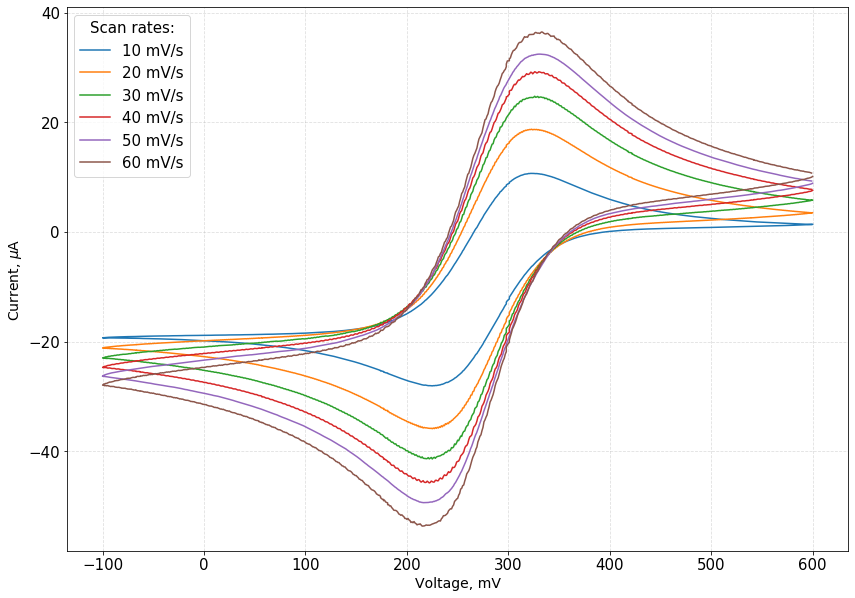

In [4]:
plt.figure(figsize=(14, 10))
plt.plot(cv_10['Voltage_mV'], cv_10['Icycle2'], label='10 mV/s')
plt.plot(cv_20['Voltage_mV'], cv_20['Icycle2'], label='20 mV/s')
plt.plot(cv_30['Voltage_mV'], cv_30['Icycle2'], label='30 mV/s')
plt.plot(cv_40['Voltage_mV'], cv_40['Icycle2'], label='40 mV/s')
plt.plot(cv_50['Voltage_mV'], cv_50['Icycle2'], label='50 mV/s')
plt.plot(cv_60['Voltage_mV'], cv_60['Icycle2'], label='60 mV/s')

plt.xlabel('Voltage, mV', fontsize = 14)
plt.ylabel(r'Current, $\mu$A', fontsize = 14)
plt.grid(alpha=.4,linestyle='--')
plt.legend(title='Scan rates:')

In [5]:
cv_peaks = {'scan_rate': scan_rate,
            'scan_rate_0.5' : [i ** 0.5 for i in scan_rate],
    'I_pa' : [],
    'I_pc' : [],
    'E_pa' : [322, 323, 326, 330, 330, 333],
    'E_pc' : [225, 225, 225, 222, 217, 215]}

for data in cv_data:
    cv_peaks['I_pa'] += [data['Icycle2'].max()]
    cv_peaks['I_pc'] += [data['Icycle2'].min()]

cv_peaks = pd.DataFrame(cv_peaks)

cv_peaks['dE'] = cv_peaks['E_pa'] - cv_peaks['E_pc']
cv_peaks['E_midpoint'] = (cv_peaks['E_pa'] + cv_peaks['E_pc']) / 2

In [6]:
F = 96485 
geometric_surface_area = 0.054 #[cm^2],Surface area 
C = 5*10**(-6) # [mol/cm3] 5mM
# D = 7 * 10**(-6) # [cm2/s] diffusion coefficient 
v = 0.01 # [V/s]
R = 8.314
n = 1
T = 298 # K, temperature
const = 0.4463 *(F ** 3/(R * T))**0.5 *geometric_surface_area * (n ** 0.5)* C

In [7]:
diffus_data = cv_peaks[['scan_rate', 'I_pa', 'I_pc']]

In [8]:
diffus_data['scan_rate'] = diffus_data['scan_rate']/1000
diffus_data['I_pa'] = diffus_data['I_pa'] * 10**(-6)
diffus_data['I_pc'] = abs(diffus_data['I_pc'] * 10**(-6))

In [9]:
diffus_data['D_pa'] = (diffus_data['I_pa'] / (const * diffus_data['scan_rate']**0.5))**2
diffus_data['D_pc'] = (diffus_data['I_pc'] / (const * diffus_data['scan_rate']**0.5))**2

In [10]:
diffus_data['scan_rate_05'] = diffus_data['scan_rate']**0.5

In [11]:
diffus_data

,scan_rate,I_pa,I_pc,D_pa,D_pc,scan_rate_05
0,0.01,0.000011,0.000028,0.000002,0.000015,0.100000
1,0.02,0.000019,0.000036,0.000003,0.000012,0.141421
2,0.03,0.000025,0.000041,0.000004,0.000011,0.173205
3,0.04,0.000029,0.000046,0.000004,0.000010,0.200000
4,0.05,0.000032,0.000049,0.000004,0.000009,0.223607
5,0.06,0.000036,0.000054,0.000004,0.000009,0.244949


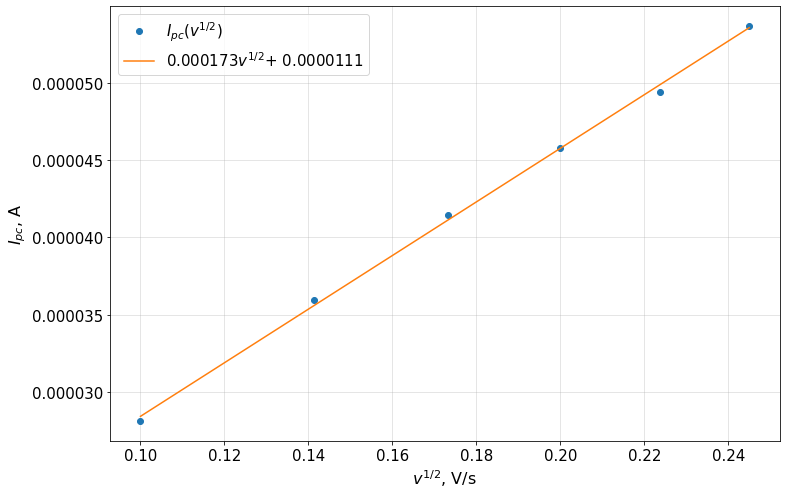

In [12]:
plt.figure(figsize=(12, 8))

plt.plot(diffus_data['scan_rate_05'], diffus_data['I_pc'], 'o', label='$I_{pc}(v^{1/2})$')
slope, b = np.polyfit(diffus_data['scan_rate_05'], diffus_data['I_pc'], 1)  # m = slope, b=intercept
label = f'{slope:.6f}' + '$v^{1/2}$' + f'+ {b:.7f}'
plt.plot(diffus_data['scan_rate_05'], slope * diffus_data['scan_rate_05'] + b, label=label)

plt.grid('--', alpha=.4)
plt.xlabel(r'$v^{1/2}$, V/s', fontsize=16)
plt.ylabel(r'$I_{pc}$, A', fontsize=16)
plt.legend()

In [13]:
const

0.07255497731364334

In [14]:
diff = (slope/const)**2

In [15]:
diff

5.716587651512452e-06

In [16]:
slope_A, b = np.polyfit(diffus_data['scan_rate_05'], diffus_data['I_pa'], 1)  # m = slope, b=intercept
(slope_A/const)**2


5.8800208772704e-06

# 3.3. Plot I vs. time dependencies for five Edc values on a single graph. 

In [17]:
ca_00 = pd.read_csv('data/CA/CA_0_0_V.dat', sep='\t')
ca_01 = pd.read_csv('data/CA/CA_0_1_V.dat', sep='\t')
ca_02 = pd.read_csv('data/CA/CA_0_2_V.dat', sep='\t')
ca_03 = pd.read_csv('data/CA/CA_0_3_V.dat', sep='\t')
ca_min_01 = pd.read_csv('data/CA/CA_min_0_1_V.dat', sep='\t')

In [18]:
ca_00['Current_A'] = abs(ca_00['Current'] * 10 ** (-6))
ca_01['Current_A'] = abs(ca_01['Current'] * 10 ** (-6))
ca_02['Current_A'] = abs(ca_02['Current'] * 10 ** (-6))
ca_03['Current_A'] = abs(ca_03['Current'] * 10 ** (-6))
ca_min_01['Current_A'] = abs(ca_min_01['Current'] * 10 ** (-6))

In [19]:
ca_min_01.head(10)

,Time,Current,Current_A
0,0.00,-258.10,0.000258
1,0.05,-188.00,0.000188
2,0.10,-155.60,0.000156
3,0.15,-135.40,0.000135
4,0.20,-121.30,0.000121
5,0.25,-110.80,0.000111
6,0.30,-102.60,0.000103
7,0.35,-95.91,0.000096
8,0.40,-90.48,0.000090
9,0.45,-85.84,0.000086


In [20]:
time_stop = 0
ca_00 = ca_00[ca_00['Time'] > time_stop]
ca_01 = ca_01[ca_01['Time'] > time_stop]
ca_02 = ca_02[ca_02['Time'] > time_stop]
ca_min_01 = ca_min_01[ca_min_01['Time'] > time_stop]

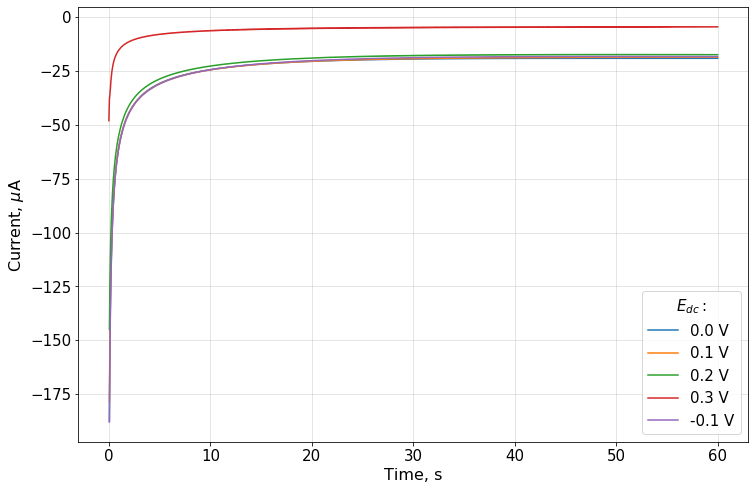

In [21]:
plt.figure(figsize=(12,8))
plt.plot(ca_00['Time'], ca_00['Current'], label='0.0 V')
plt.plot(ca_01['Time'], ca_01['Current'], label='0.1 V')
plt.plot(ca_02['Time'], ca_02['Current'], label='0.2 V')
plt.plot(ca_03['Time'], ca_03['Current'], label='0.3 V')
plt.plot(ca_min_01['Time'], ca_min_01['Current'], label='-0.1 V')

plt.grid('--', alpha=.4)
plt.xlabel('Time, s', fontsize = 16)
plt.ylabel(r'Current, $\mu$A', fontsize = 16)
plt.legend(title='$E_{dc}:$')

# 3.4. Construct Cottrell plots (on a single graph for all the Edc values) and calculate diffusion coefficient. Which Edc potentials and which regions of the transient should be used for the calculation and why?

In [22]:
time_treashhold = 2
ca_00 = ca_00[ca_00['Time'] > time_treashhold]
ca_01 = ca_01[ca_01['Time'] > time_treashhold]
ca_02 = ca_02[ca_02['Time'] > time_treashhold]
ca_03 = ca_03[ca_03['Time'] > time_treashhold]
ca_min_01 = ca_min_01[ca_min_01['Time'] > time_treashhold]

In [23]:
ca_00['Time^0.5']=ca_00['Time']**(-0.5)
ca_01['Time^0.5']=ca_01['Time']**(-0.5)
ca_02['Time^0.5']=ca_02['Time']**(-0.5)
ca_03['Time^0.5']=ca_03['Time']**(-0.5)
ca_min_01['Time^0.5']=ca_min_01['Time']**(-0.5)

In [24]:
ca_00

,Time,Current,Current_A,Time^0.5
41,2.05,-43.70,0.000044,0.698430
42,2.10,-43.28,0.000043,0.690066
43,2.15,-42.83,0.000043,0.681994
44,2.20,-42.45,0.000042,0.674200
45,2.25,-42.03,0.000042,0.666667
...,...,...,...,...
1196,59.80,-19.08,0.000019,0.129315
1197,59.85,-19.06,0.000019,0.129261
1198,59.90,-19.08,0.000019,0.129207
1199,59.95,-19.06,0.000019,0.129153


In [25]:
slope_00, b = np.polyfit(ca_00['Time^0.5'], ca_00['Current_A'], 1)
slope_01, b = np.polyfit(ca_01['Time^0.5'], ca_01['Current_A'], 1)
slope_02, b = np.polyfit(ca_02['Time^0.5'], ca_02['Current_A'], 1)
slope_03, b = np.polyfit(ca_03['Time^0.5'], ca_03['Current_A'], 1)
slope_min_01, b = np.polyfit(ca_min_01['Time^0.5'], ca_min_01['Current_A'], 1)

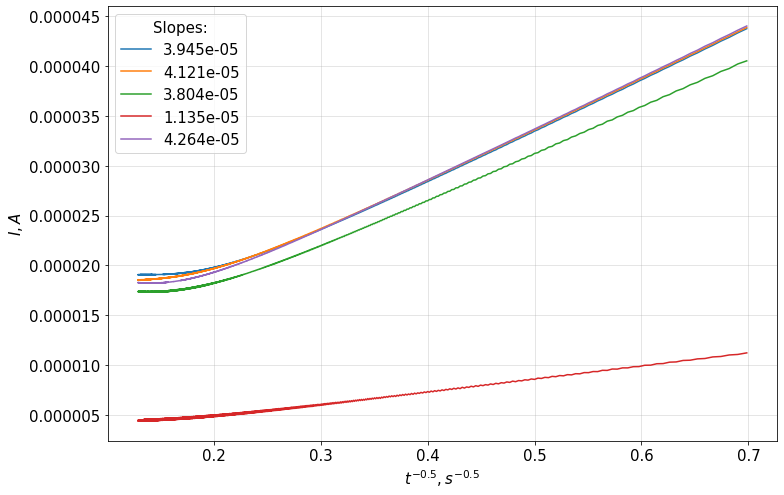

In [26]:
plt.figure(figsize=(12, 8))

plt.plot(ca_00['Time^0.5'], ca_00['Current_A'], label = f'{slope_00:.3e}')
plt.plot(ca_01['Time^0.5'], ca_01['Current_A'], label = f'{slope_01:.3e}')
plt.plot(ca_02['Time^0.5'], ca_02['Current_A'], label = f'{slope_02:.3e}')
plt.plot(ca_03['Time^0.5'], ca_03['Current_A'], label = f'{slope_03:.3e}')
plt.plot(ca_min_01['Time^0.5'], ca_min_01['Current_A'], label = f'{slope_min_01:.3e}')

plt.xlabel(r'$t^{-0.5}, s^{-0.5}$')
plt.ylabel(r'$I, A$')
plt.grid('--', alpha=.4)
plt.legend(title='Slopes:')

In [27]:
F = 96485 
A = 0.054 #[cm^2],Surface area 
C = 5*10**(-6) # [mol/cm3] 5mM
n = 1
const = (n*F*A*C)/np.pi**0.5

In [29]:
const

0.014697674631523421

In [28]:
print(f'{(slope_00/const)**2:.3e}')
print(f'{(slope_01/const)**2:.3e}')
print(f'{(slope_02/const)**2:.3e}')
print(f'{(slope_03/const)**2:.3e}')
print(f'{(slope_min_01/const)**2:.3e}')

7.203e-06
7.862e-06
6.699e-06
5.959e-07
8.418e-06
